In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2 
from sklearn.decomposition import PCA 


In [51]:
''' 
Objective - Divide given micrograph (image ) into 100 parts and corresponding to each part , take N points (sequentially ) from stress strain curve .
Now , train the CNN model on this , and predict using last 3 parts , the further curve .

'''

' \nObjective - Divide given micrograph (image ) into 10 parts and corresponding to each part , take N points (sequentially ) from stress strain curve .\nNow , train the CNN model on this , and predict using last 3 parts , the further curve .\n\n'

In [52]:
''' Research Paper Link ->  https://www.sciencedirect.com/science/article/pii/S0264127520300423?ref=pdf_download&fr=RR-2&rr=872bd24c7cde54e7

Time for Implementing the Research Paper -> 2.5 - 3 hours 
Hyperparameter TUning -> 

DE Solve using Abaqus -> 1 hrs 
Meshing -> 1 hr 

'''

' Research Paper Link ->  https://www.sciencedirect.com/science/article/pii/S0264127520300423?ref=pdf_download&fr=RR-2&rr=872bd24c7cde54e7\n\nTime for Implementing the Research Paper -> 2.5 - 3 hours \nHyperparameter TUning -> \n\nDE Solve using Abaqus -> 1 hrs \nMeshing -> 1 hr \n\n\n'

In [53]:
A_T = pd.read_csv("D:\This Project\MicrosStructure Analysis\A_T.csv")
A_T.columns = {'strain' , 'stress'}

A_L = pd.read_csv("D:\This Project\MicrosStructure Analysis\A_L.csv")
A_L.columns = {'strain' , 'stress'}

D_T = pd.read_csv("D:\This Project\MicrosStructure Analysis\D_T.csv")
D_T.columns = {'strain' , 'stress'}

D_L = pd.read_csv("D:\This Project\MicrosStructure Analysis\D_L.csv")
D_L.columns = {'strain' , 'stress'}

In [54]:
# Preprocessing the image 

def preprocess_img( img ) :

    # sharpen the image 

    sharpen = np.array( [[-1 , -1 , -1] , [-1 , 9 , -1 ] , [-1 , -1 , -1 ] ] ) 
    img_1 = cv2.filter2D(img , -1 ,  sharpen )  # (-1 -> depth of in and out be same )

    # Histogram Equalization -  redistrbute the pixel intensitires in pic and increase contrast 
    img_gray = cv2.cvtColor( img_1 , cv2.COLOR_BGR2GRAY)
    img_2 = cv2.equalizeHist(img_gray)

    thresh = 129
    im_bw = cv2.threshold(img_2, thresh, 255, cv2.THRESH_BINARY)[1]
    
    final_img = cv2.resize(im_bw , (300 , 300 ))
    return final_img




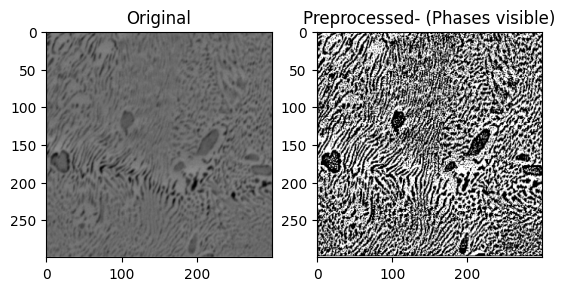

In [55]:
img = cv2.imread('Images\D_T.png')
New_img = preprocess_img(img)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.title('Original')
plt.imshow(np.rot90( cv2.resize(img , (300 , 300 ) ) ,2))

f.add_subplot(1,2, 2)

plt.title('Preprocessed- (Phases visible)')
plt.imshow(np.rot90(New_img,2) , cmap='gray')  # for plt.imshow , use cmap = ;gray to show image actually in Grayscale 
plt.show(block=True)

# Phases 1 and 2 speerated 

In [56]:
# applying PCA on test data  *target label)  stress (high dimension vector )-> we have a data of large quantity of stress data 

# Here , my stress matrix has shape 19 x1 , so we do PCA 

def pca_stress_matrix ( stress , comp ) :
    pca = PCA(n_components = comp )
    X_new = pca.fit_transform(stress)

    return X_new 

In [57]:
# My COnvolution Neural Network Architecture 

import tensorflow as tf 
from tensorflow import keras 
from keras.layers import Conv2D , MaxPool2D , GlobalAveragePooling2D , LeakyReLU , Flatten ,Dense   , BatchNormalization


In [58]:
# CNN 

ms_model = keras.models.Sequential([
   Conv2D(  16 , (3 , 3)  , input_shape = (300 , 300 , 1 ))  , 
   LeakyReLU(alpha=0.05) ,
   BatchNormalization(),
    MaxPool2D(2 ) ,

   Conv2D(  16 , (3 , 3) )  , 
   LeakyReLU(alpha=0.05) ,
   BatchNormalization(),
    MaxPool2D(2 ) ,

   Conv2D(  16 , (3 , 3)  )  , 
   LeakyReLU(alpha=0.05) ,
   BatchNormalization(),
    MaxPool2D(2 ) ,

# Use Pooling 
 

   Conv2D(  16 , (3 , 3)  )  , 
   LeakyReLU(alpha=0.05) ,
   BatchNormalization(),
   

   Conv2D(  16 , (3 , 3) )  , 
   LeakyReLU(alpha=0.05) ,
   BatchNormalization(),
   
   

   Conv2D(  16 , (3 , 3) )  , 
   LeakyReLU(alpha=0.05) ,
   BatchNormalization(),
   

   Conv2D(  16 , (3 , 3)  )  , 
   LeakyReLU(alpha=0.05) ,
   BatchNormalization(),
   
   Conv2D(  16 , (3 , 3) )  , 
   LeakyReLU(alpha=0.05) ,
   BatchNormalization(),
  

   Conv2D(  16 , (3 , 3)  )  , 
   LeakyReLU(alpha=0.05) ,
   BatchNormalization(),
    

   Conv2D(  16 , (3 , 3) )  , 
   LeakyReLU(alpha=0.05) ,
   BatchNormalization(),
  

   Conv2D(  16 , (3 , 3)  )  , 
   LeakyReLU(alpha=0.05) ,
   BatchNormalization() ,
  

   Conv2D(  16 , (3 , 3)  )  , 
   LeakyReLU(alpha=0.05) ,
   BatchNormalization(),
    MaxPool2D(2 ) ,
   
GlobalAveragePooling2D() ,  # average of all pixel values in feature map while MaxPool uses a window and fisd max pixel value in Window .`1`

Flatten() ,


Dense( 20, activation = 'linear') 


])

# Batch Normal keeps the data normally distributed 

In [135]:
def plot_pixel_intensity(image):
    # img = preprocess_img(image)
    
    # Count black and white pixels
    black_pixels = np.count_nonzero(img == 0)
    white_pixels = np.count_nonzero(img == 255)
    
    # Plot histogram
    print('Cu - ' , black_pixels)
    print('Ag -' , white_pixels)
    plt.bar(['Copper(Cu)', 'Silver(Ag)'], [black_pixels, white_pixels], color=['black', 'gray'])
    plt.xlabel('Material ')
    plt.ylabel('volume(Pixel distribution) ')
    plt.title('Pixel Intensity Histogram')
    plt.show()

Cu -  19388
Ag - 16935


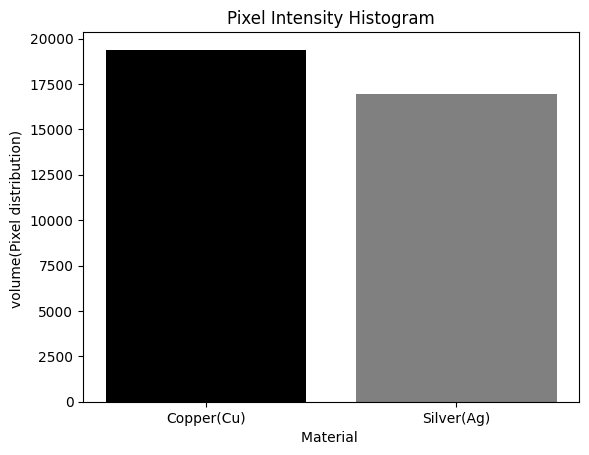

In [136]:
plot_pixel_intensity(New_img)

In [61]:
# Similarity Score 
# to see how similar are two images regarding their visual micro-graphs 

def visualize_image_features(gray):
   
    # Edge detection using Canny edge detector
    edges = cv2.Canny(gray, 50, 150)

    # Keypoint detection using SIFT
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    # Visualize edge detection
    plt.subplot(121), plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection'), plt.xticks([]), plt.yticks([])

    # Visualize keypoints
    image_with_keypoints = cv2.drawKeypoints(gray, keypoints, None)
    plt.subplot(122), plt.imshow(image_with_keypoints)
    plt.title('Keypoint Detection (SIFT)'), plt.xticks([]), plt.yticks([])

    plt.show()

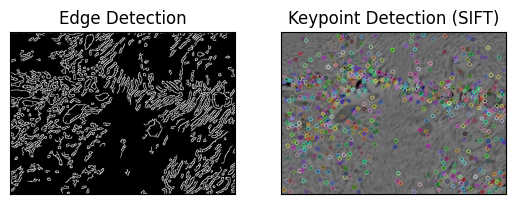

In [62]:

visualize_image_features(img)

In [63]:
# Cropping images into 10 parts 

def crop_10 ( image , stress ) :
    img_parts  = []

    img = image
    height , width = img.shape[:2]
    part_y = height//10
    part_x = width//10

    k =0 
    Stress= []

    vf = []
   
    target_size =  (300, 300)
    for i in range(10) :
        start_x = i*part_x 
        end_x = start_x + part_x 
        for j in range (10) :

            start_y = j *part_y
            end_y = start_y + part_y 

            part = img[start_x: end_x , start_y : end_y  ]

            # part = cv2.GaussianBlur(part, (5, 5), 0)

# Adjust contrast to enhance texture
            part = cv2.convertScaleAbs( part , alpha=1.5, beta=20)

            #part = cv2.bilateralFilter( part , d=9, sigmaColor=75, sigmaSpace=75)


            part = cv2.resize(part, target_size)
   
   # Volume fraction of Cu  in Cu-Ag 
            black_pixels = np.count_nonzero(img == 0)
            white_pixels = np.count_nonzero(img == 255)
            
            vf_black = black_pixels / ( black_pixels + white_pixels)
            vf.append( vf_black)
            img_parts.append(part)

            Stress.append(stress[k : k+20])
            k+=20
    
    return img_parts , Stress , vf

    

In [64]:
# to eascape from 


def resize_img_input (images, n_images ) : 
    #lis = [images]
    
    return np.asarray(images).astype(np.float32).reshape( n_images , 300 , 300  )

def resize_label_output(stress , n_images ) :
    lis = stress
    stress_new = np.asarray(lis).astype(np.float32)
    return stress_new 


def resize_vf(vf, n_images ) :
    lis = vf
    vf1 = np.asarray(lis).astype(np.float32)
    return vf1


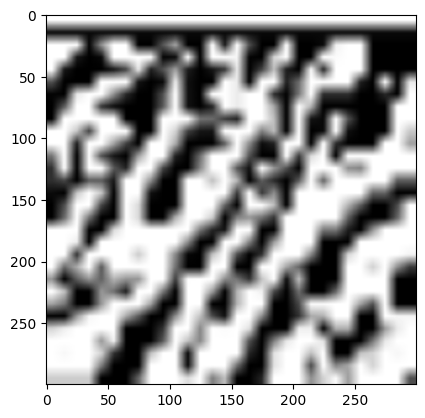

In [65]:
imgs = crop_10( New_img , A_L['stress'])
imgs[0][0].shape
plt.imshow(imgs[0][7] , cmap ='gray')
plt.show()

In [66]:
# Lis_img2 , Lis_stress2 = crop_10(New_img , A_L['stress'])

img =cv2.imread( 'Images/A_L.png')
img = preprocess_img(img)
Lis_img1 , Lis_stress1 , vf1 = crop_10(img , A_L['stress'])


img =cv2.imread( 'Images/A_T.png')
img = preprocess_img(img)
Lis_img2 , Lis_stress2 , vf2 = crop_10(img , A_T['stress'])


img =cv2.imread( 'Images/D_L.png')
img = preprocess_img(img)
Lis_img3, Lis_stress3 , vf3 = crop_10(img , D_L['stress'])

img =cv2.imread( 'Images/D_T.png')
img = preprocess_img(img)
Lis_img4 , Lis_stress4 , vf4 = crop_10(img , D_T['stress'])


In [67]:
Lis_img = Lis_img1 + Lis_img2 + Lis_img3 + Lis_img4
Lis_stress =  Lis_stress1 +  Lis_stress2 +  Lis_stress3 +  Lis_stress4
vF = vf1 + vf2 + vf3 + vf4 

In [68]:
Img2 = resize_img_input( Lis_img , 100*4 )
Label2 = resize_label_output( Lis_stress , 100*4 )

In [69]:
vf2 = resize_vf( vF , 100* 4)

In [70]:
ms_model.compile( loss = 'mse' , optimizer = 'adam' , metrics = ['mae'])

In [71]:


Img_train = Img2[: 350 ]
Label_train = Label2[: 350 ]


Img_test = Img2[ 350  : ]
Label_test = Label2[ 350 : ]

In [72]:
ms_model.fit( Img_train  , Label_train  ,  epochs= 500 )


Epoch 1/500
11/11 [==============================] - 14s 989ms/step - loss: 0.4113 - mae: 0.4969
Epoch 2/500
11/11 [==============================] - 10s 929ms/step - loss: 0.1063 - mae: 0.2320
Epoch 3/500
11/11 [==============================] - 10s 921ms/step - loss: 0.0649 - mae: 0.1858
Epoch 4/500
11/11 [==============================] - 11s 959ms/step - loss: 0.0468 - mae: 0.1585
Epoch 5/500
11/11 [==============================] - 10s 911ms/step - loss: 0.0362 - mae: 0.1399
Epoch 6/500
11/11 [==============================] - 10s 912ms/step - loss: 0.0287 - mae: 0.1252
Epoch 7/500
11/11 [==============================] - 10s 920ms/step - loss: 0.0234 - mae: 0.1127
Epoch 8/500
11/11 [==============================] - 10s 918ms/step - loss: 0.0189 - mae: 0.1017
Epoch 9/500
11/11 [==============================] - 10s 915ms/step - loss: 0.0157 - mae: 0.0927
Epoch 10/500
11/11 [==============================] - 10s 912ms/step - loss: 0.0131 - mae: 0.0842
Epoch 11/500
11/11 [=========

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score


predictions = ms_model.predict(Img_test)


# Validatiing the predictio (results) Using MSE and MAE 
# MSE is abetter emtric since NOT offest by negative values 

mse = mean_squared_error(Label_test, predictions)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(Label_test, predictions)
print("Mean Absolute Error:", mae)

# R2 score  - percent of variance explained by model 
# if Near 1 -> good 
# if near 0 or negative , bad 
r2_score = r2_score(Label_test, predictions)
print("R2 score :", r2_score )


2/2 [==============================] - 1s 122ms/step
Mean Squared Error: 0.000354761
Mean Absolute Error: 0.015517059
R2 score : -9.636532046084366


1/1 [==============================] - 0s 78ms/step


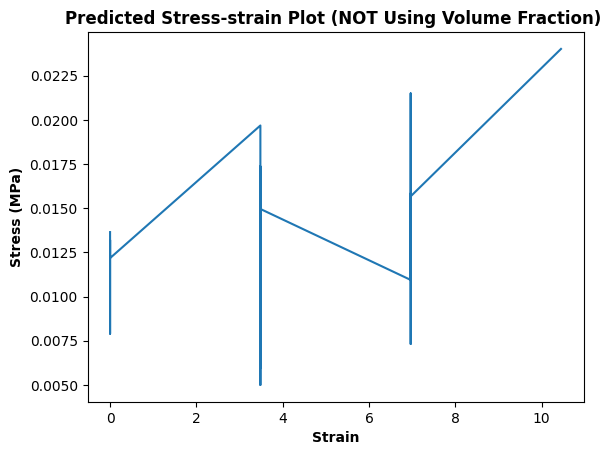

In [154]:
k = ms_model.predict(Img2[:1])
k = k.reshape(20 , -1 )
plt.plot(A_L['strain'][:20] , k )

plt.xlabel('Strain',fontweight = 'bold')
plt.ylabel('Stress (MPa)',fontweight = 'bold')
plt.title ('Predicted Stress-strain Plot (NOT Using Volume Fraction) '  ,fontweight = 'bold')
plt.show()



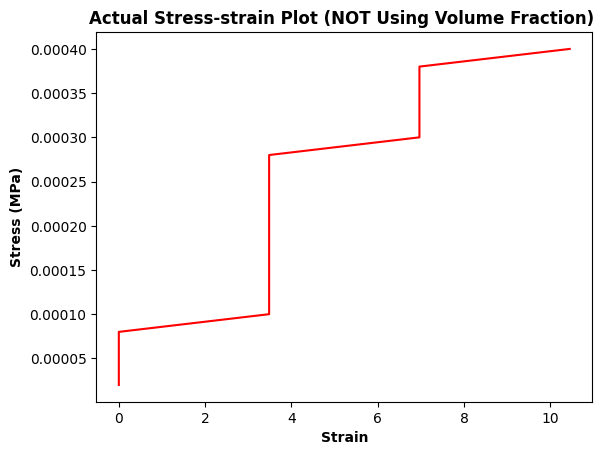

In [155]:
plt.plot(A_L['strain'][:20] , A_L['stress'][:20] , color = 'red')
plt.title ('Actual Stress-strain Plot (NOT Using Volume Fraction) ' ,fontweight = 'bold')
plt.xlabel('Strain',fontweight = 'bold')
plt.ylabel('Stress (MPa)',fontweight = 'bold')
plt.show()


In [84]:
# Image input
image_input = keras.layers.Input(shape=(300, 300, 1), name='image_input')

# Integer input
integer_input = keras.layers.Input(shape=(1,), name='integer_input')

conv_1 = keras.layers.Conv2D(16, (3, 3), activation='relu')(image_input)
conv_2 = keras.layers.Conv2D(16, (3, 3), activation='relu')(conv_1)
conv_3 = keras.layers.Conv2D(16, (3, 3), activation='relu')(conv_2)
# Modified CNN architecture
conv1 = keras.layers.Conv2D(16, (3, 3), activation='relu')(conv_3)
maxpool1 = keras.layers.MaxPooling2D((2, 2))(conv1)

conv2 = keras.layers.Conv2D(16, (3, 3), activation='relu')(maxpool1)
maxpool2 = keras.layers.MaxPooling2D((2, 2))(conv2)

conv3 = keras.layers.Conv2D(16, (3, 3), activation='relu')(maxpool2)
maxpool3 = keras.layers.MaxPooling2D((2, 2))(conv3)

conv4= keras.layers.Conv2D(16, (3, 3), activation='relu')(maxpool3)
maxpool4 = keras.layers.MaxPooling2D((2, 2))(conv4)

conv5 = keras.layers.Conv2D(16, (3, 3), activation='relu')(maxpool4)
maxpool5 = keras.layers.MaxPooling2D((2, 2))(conv5)

conv6 = keras.layers.Conv2D(16, (3, 3), activation='relu')(maxpool5)
maxpool6 = keras.layers.MaxPooling2D((2, 2))(conv6)


flatten_image = keras.layers.Flatten()(maxpool6)
concatenated = keras.layers.Concatenate()([flatten_image, integer_input])

# Dense layers for concatenated inputs
dense1 = keras.layers.Dense(64, activation='relu')(concatenated)
output = keras.layers.Dense(20, activation='linear')(dense1)

# Define the model with two inputs
ms_model1 = keras.models.Model(inputs=[image_input, integer_input], outputs=output)


In [85]:
ms_model1.compile( loss = 'mse' , optimizer = 'adam' , metrics = ['mae'])
ms_model1.fit( [ Img2 , vf2]  , Label2 , epochs = 510 )   

Epoch 1/510
13/13 [==============================] - 40s 3s/step - loss: 3.1721 - mae: 0.7114
Epoch 2/510
13/13 [==============================] - 37s 3s/step - loss: 0.0111 - mae: 0.0801
Epoch 3/510
13/13 [==============================] - 38s 3s/step - loss: 0.0042 - mae: 0.0513
Epoch 4/510
13/13 [==============================] - 39s 3s/step - loss: 0.0024 - mae: 0.0391
Epoch 5/510
13/13 [==============================] - 38s 3s/step - loss: 0.0017 - mae: 0.0329
Epoch 6/510
13/13 [==============================] - 37s 3s/step - loss: 0.0012 - mae: 0.0277
Epoch 7/510
13/13 [==============================] - 38s 3s/step - loss: 8.6812e-04 - mae: 0.0234
Epoch 8/510
13/13 [==============================] - 38s 3s/step - loss: 6.2676e-04 - mae: 0.0199
Epoch 9/510
13/13 [==============================] - 38s 3s/step - loss: 4.6012e-04 - mae: 0.0170
Epoch 10/510
13/13 [==============================] - 38s 3s/step - loss: 3.5639e-04 - mae: 0.0149
Epoch 11/510
13/13 [=======================

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score


predictions1 = ms_model1.predict([Img_test , vf2[350: ] ] )


# Validatiing the predictio (results) Using MSE and MAE 
# MSE is abetter emtric since NOT offest by negative values 

mse = mean_squared_error(Label_test, predictions1)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(Label_test, predictions1)
print("Mean Absolute Error:", mae)

# R2 score  - percent of variance explained by model 
# if Near 1 -> good 
# if near 0 or negative , bad 
r2_score = r2_score(Label_test, predictions1)
print("R2 score :", r2_score )


2/2 [==============================] - 1s 239ms/step
Mean Squared Error: 8.801568e-06
Mean Absolute Error: 0.0022600058
R2 score : 0.7361084728316


1/1 [==============================] - 0s 52ms/step


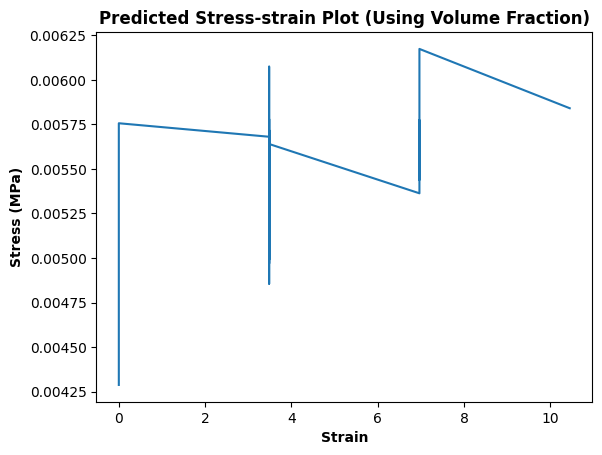

In [159]:
k = ms_model1.predict([Img2[:1] , vf2[:1] ] )
k = k.reshape(20 , -1 )
plt.plot(A_L['strain'][:20] , k )
plt.title ('Predicted Stress-strain Plot (Using Volume Fraction)',fontweight = 'bold')
plt.xlabel('Strain',fontweight = 'bold')
plt.ylabel('Stress (MPa)',fontweight = 'bold')
plt.show()



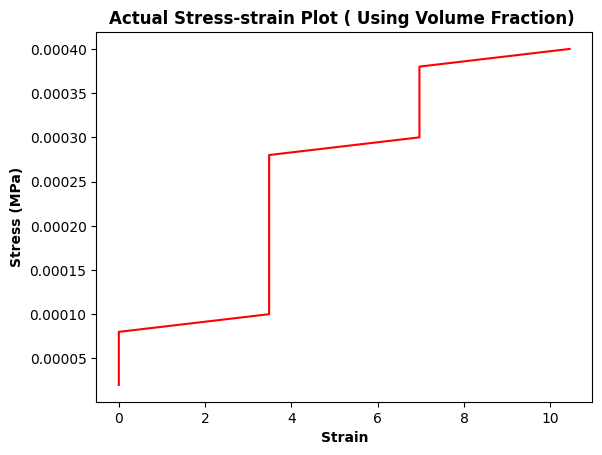

In [158]:

plt.plot(A_L['strain'][:20] , A_L['stress'][:20] , color = 'red')
plt.title ('Actual Stress-strain Plot ( Using Volume Fraction) ',fontweight = 'bold')
plt.xlabel('Strain',fontweight = 'bold')
plt.ylabel('Stress (MPa)',fontweight = 'bold')
plt.show()

Model Path: None
